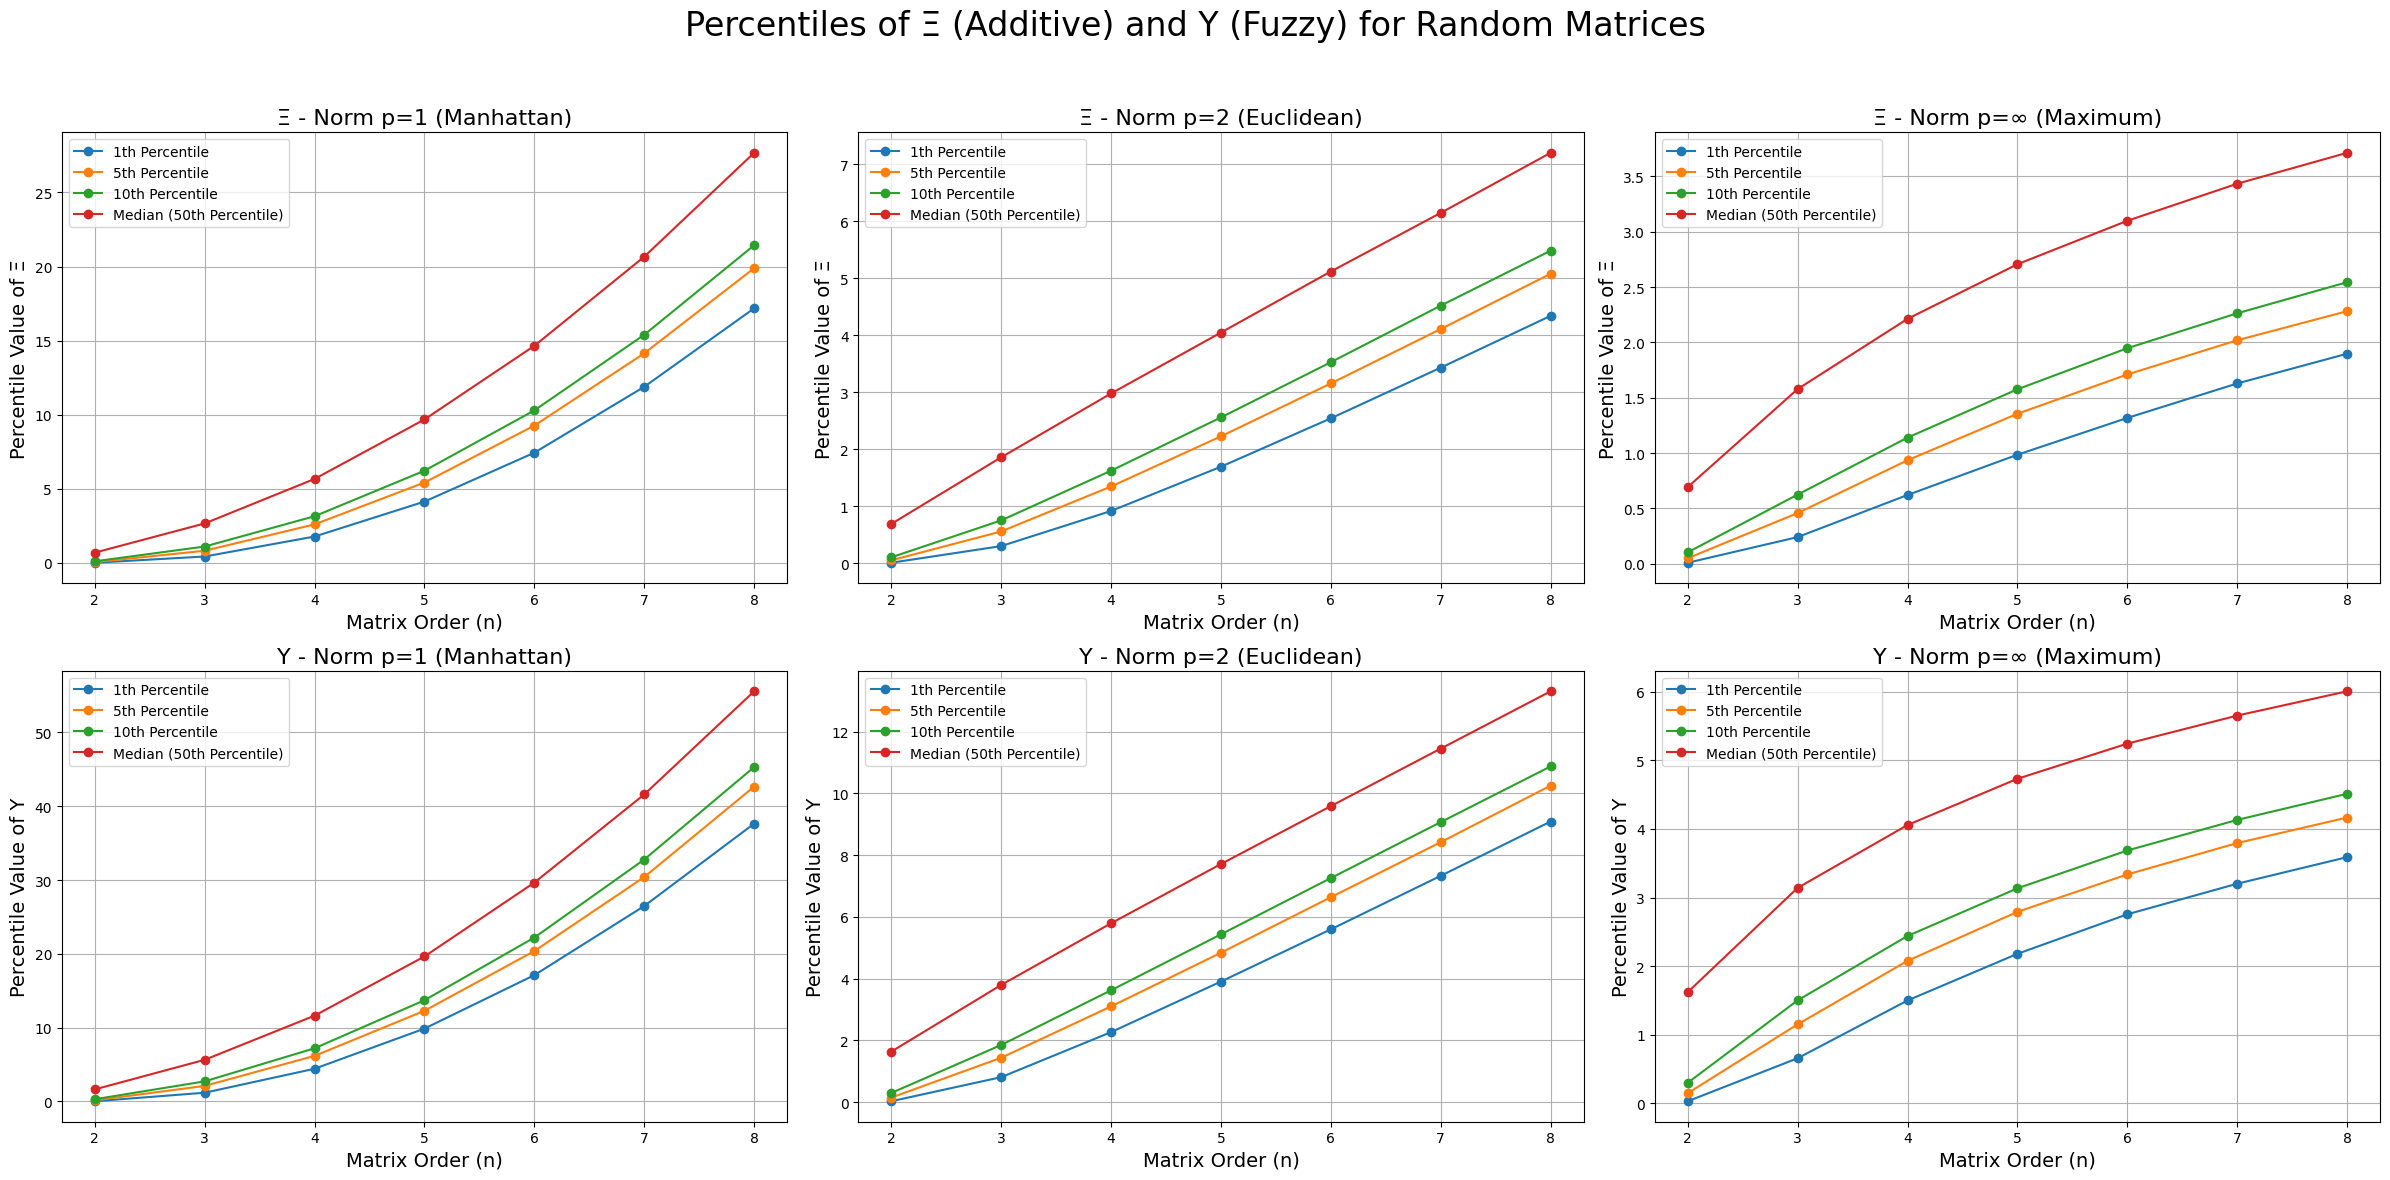

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Cargar archivos de matrices aditivas
files_add_norm1 = sorted(glob.glob("additive_*x*_p1.xlsx"))   # Norm p=1
files_add_norm2 = sorted(glob.glob("additive_*x*_p2.xlsx"))   # Norm p=2
files_add_norminf = sorted(glob.glob("additive_*x*_pinf.xlsx"))  # Norm p=∞

# Cargar archivos de matrices fuzzy
files_fuzzy_norm1 = sorted(glob.glob("fuzzy_*x*_p1.xlsx"))   # Norm p=1
files_fuzzy_norm2 = sorted(glob.glob("fuzzy_*x*_p2.xlsx"))   # Norm p=2
files_fuzzy_norminf = sorted(glob.glob("fuzzy_*x*_pinf.xlsx"))  # Norm p=∞

# Extraer valores de 'n' desde los nombres de los archivos (de los fuzzy es suficiente)
n_values = [int(f.split('_')[1][0]) for f in files_fuzzy_norm1]

# Función para extraer percentiles de cada archivo
def extract_percentiles(files, percentiles=[1, 5, 10, 50]):
    data = {p: [] for p in percentiles}
    for file in files:
        df = pd.read_excel(file)
        for p in percentiles:
            value = df[df['percentile'] == p]['Avg'].values[0]
            data[p].append(value)
    return data

# Extraer datos aditivos
data_add_norm1 = extract_percentiles(files_add_norm1)
data_add_norm2 = extract_percentiles(files_add_norm2)
data_add_norminf = extract_percentiles(files_add_norminf)

# Extraer datos fuzzy
data_fuzzy_norm1 = extract_percentiles(files_fuzzy_norm1)
data_fuzzy_norm2 = extract_percentiles(files_fuzzy_norm2)
data_fuzzy_norminf = extract_percentiles(files_fuzzy_norminf)

# Crear figura con 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(24, 12))
fig.suptitle('Percentiles of Ξ (Additive) and Υ (Fuzzy) for Random Matrices', fontsize=24)

# Función para plotear cada subgráfico
def plot_subplot(ax, n_values, data, title, ylabel):
    percentiles = sorted(data.keys())
    for p in percentiles:
        label = f"{p}th Percentile" if p != 50 else "Median (50th Percentile)"
        ax.plot(n_values, data[p], marker='o', label=label)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Matrix Order (n)', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True)
    ax.set_xticks(n_values)
    ax.legend()

# --- Dibujar fila superior: aditivas ---
plot_subplot(axs[0, 0], n_values, data_add_norm1, 'Ξ - Norm p=1 (Manhattan)', 'Percentile Value of Ξ')
plot_subplot(axs[0, 1], n_values, data_add_norm2, 'Ξ - Norm p=2 (Euclidean)', 'Percentile Value of Ξ')
plot_subplot(axs[0, 2], n_values, data_add_norminf, 'Ξ - Norm p=∞ (Maximum)', 'Percentile Value of Ξ')

# --- Dibujar fila inferior: fuzzy ---
plot_subplot(axs[1, 0], n_values, data_fuzzy_norm1, 'Υ - Norm p=1 (Manhattan)', 'Percentile Value of Υ')
plot_subplot(axs[1, 1], n_values, data_fuzzy_norm2, 'Υ - Norm p=2 (Euclidean)', 'Percentile Value of Υ')
plot_subplot(axs[1, 2], n_values, data_fuzzy_norminf, 'Υ - Norm p=∞ (Maximum)', 'Percentile Value of Υ')

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Guardar figura
fig.savefig('additive_fuzzy_percentiles.png', dpi=300)

plt.show()
